# Overview

Exploring different colorspaces, especially in regards to how they define distance between to given colors. Comparing conventional distance metrics to biologically inspired color distance metrics.

# Imports 

In [1]:
import colorharmonies as ch
import colorsys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth=100
from skimage import io, color
from colormath.color_objects import LabColor, XYZColor,sRGBColor,xyYColor,HSVColor
from colormath.color_conversions import convert_color
from itertools import combinations

**ways to convert**

1. from skimage import io,color
      
    https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.lab2xyz

    ex.
    ```
    color.rgb2lab([[[2,23,2]]])[0][0][0] #lab color
    ```

2. import colorsys

    https://docs.python.org/3/library/colorsys.html

    does not do lab or xyY,xyZ

    ex. 

    ```
    colorsys.hsv_to_rgb(0.5,0.1,0.3) 
    ```

3. from colormath.color_objects import LabColor, XYZColor,sRGBColor,xyYColor,HSVColor
   
   from colormath.color_conversions import convert_color
    
    https://python-colormath.readthedocs.io/en/latest/conversions.html
    
    ex.

    ```
    convert_color(sRGBColor(0.75,0.18,0.18),xyYColor)
    ```
    
    
both option 1 and 3 are sufficient enough to do this, skimage does not have xyY

**comparing skimage and colormath**

# Create colors and convert to different spaces

Create colors via the HSV space 
-https://en.wikipedia.org/wiki/HSL_and_HSV

In [32]:
hue_gradient = np.linspace(0, 1,16)#to plot colors everything needs to be between 0-1
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)*0.75 #set equal satuartion and brightness for ease of computation
hsv[:, :, 0] = hue_gradient
hsv

array([[[0.        , 0.75      , 0.75      ],
        [0.06666667, 0.75      , 0.75      ],
        [0.13333333, 0.75      , 0.75      ],
        [0.2       , 0.75      , 0.75      ],
        [0.26666667, 0.75      , 0.75      ],
        [0.33333333, 0.75      , 0.75      ],
        [0.4       , 0.75      , 0.75      ],
        [0.46666667, 0.75      , 0.75      ],
        [0.53333333, 0.75      , 0.75      ],
        [0.6       , 0.75      , 0.75      ],
        [0.66666667, 0.75      , 0.75      ],
        [0.73333333, 0.75      , 0.75      ],
        [0.8       , 0.75      , 0.75      ],
        [0.86666667, 0.75      , 0.75      ],
        [0.93333333, 0.75      , 0.75      ],
        [1.        , 0.75      , 0.75      ]]])

In [116]:
h,s,v=cv2.split(hsv)

<IPython.core.display.Javascript object>


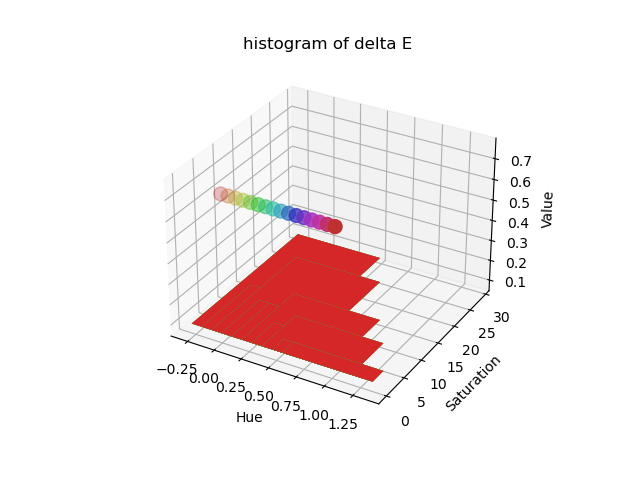

In [130]:
%matplotlib notebook
fig=plt.figure()
axis= fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors=rgb[0],marker="o",s=100)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.title('HSV Space')
plt.show()

Convert to RGB space after forming triplets

In [119]:
rgb=color.hsv2rgb(hsv)
rgb

array([[[0.75  , 0.1875, 0.1875],
        [0.75  , 0.4125, 0.1875],
        [0.75  , 0.6375, 0.1875],
        [0.6375, 0.75  , 0.1875],
        [0.4125, 0.75  , 0.1875],
        [0.1875, 0.75  , 0.1875],
        [0.1875, 0.75  , 0.4125],
        [0.1875, 0.75  , 0.6375],
        [0.1875, 0.6375, 0.75  ],
        [0.1875, 0.4125, 0.75  ],
        [0.1875, 0.1875, 0.75  ],
        [0.4125, 0.1875, 0.75  ],
        [0.6375, 0.1875, 0.75  ],
        [0.75  , 0.1875, 0.6375],
        [0.75  , 0.1875, 0.4125],
        [0.75  , 0.1875, 0.1875]]])

<IPython.core.display.Javascript object>


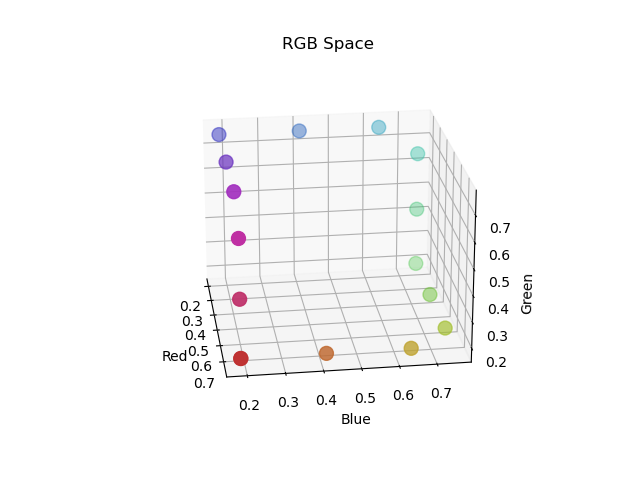

In [122]:
r,g,b=cv2.split(rgb)
%matplotlib notebook
fig=plt.figure()
axis= fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=rgb[0],marker="o",s=100)
axis.set_xlabel("Red")
axis.set_ylabel("Blue")
axis.set_zlabel("Green")
plt.title('RGB Space')
plt.show()

convert to CIELAB space

- https://en.wikipedia.org/wiki/CIELAB_color_space
- CIELAB colorspace is a device-independent, "standard observer" model. The colors it defines are not relative to any particular device such as a computer monitor or a printer, but instead relate to the CIE standard observer which is an averaging of the results of color matching experiments under laboratory conditions.

In [123]:
lab=color.rgb2lab(rgb)

In [124]:
l,a,b=cv2.split(lab)

<IPython.core.display.Javascript object>


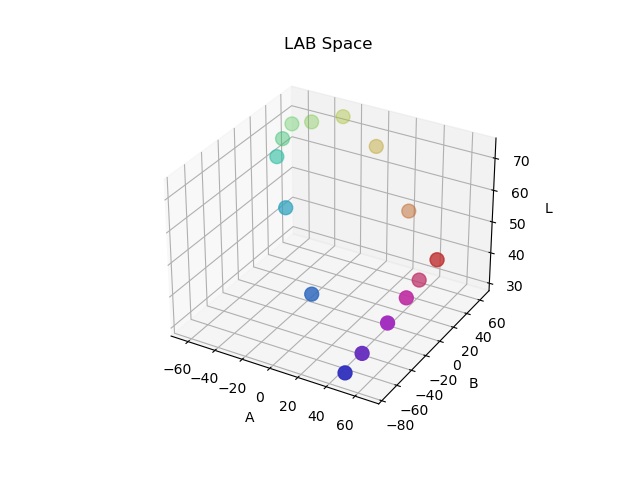

In [128]:
%matplotlib notebook
fig=plt.figure()
axis= fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(a.flatten(),b.flatten(),l.flatten(),facecolors=rgb[0],marker="o",s=100)
axis.set_xlabel("A")
axis.set_ylabel("B")
axis.set_zlabel("L")
plt.title('LAB Space')
plt.show()

Put together

In [146]:
stimnames=pd.DataFrame(['Color'+str(i) for i in np.arange(1,17)],columns=['stimname'])
rgbDF=pd.DataFrame(rgb[0],columns=['Red','Green','Blue'])
hsvDF=pd.DataFrame(hsv[0],columns=['Hue','Sat','Val'])
colorsDF=pd.concat([stimnames,rgbDF,hsvDF,labDF],axis=1)
colorsDF['id']=np.arange(1,17)
colorsDF

,stimname,Red,Green,Blue,Hue,Sat,Val,L,A,B,id
0,Color1,0.7500,0.1875,0.1875,0.000000,0.75,0.75,43.392372,56.156772,35.100380,1
1,Color2,0.7500,0.4125,0.1875,0.066667,0.75,0.75,52.672151,31.835451,45.056996,2
2,Color3,0.7500,0.6375,0.1875,0.133333,0.75,0.75,65.666904,2.454400,57.999615,3
3,Color4,0.6375,0.7500,0.1875,0.200000,0.75,0.75,73.871066,-23.880591,65.234632,4
4,Color5,0.4125,0.7500,0.1875,0.266667,0.75,0.75,70.553327,-44.816891,60.908662,5
5,Color6,0.1875,0.7500,0.1875,0.333333,0.75,0.75,68.555217,-60.078333,58.273381,6
6,Color7,0.1875,0.7500,0.4125,0.400000,0.75,0.75,68.480484,-59.575740,43.187219,7
7,Color8,0.1875,0.7500,0.6375,0.466667,0.75,0.75,69.335117,-49.865841,16.647997,8
8,Color9,0.1875,0.6375,0.7500,0.533333,0.75,0.75,70.708176,-35.885870,-10.693748,9
9,Color10,0.1875,0.4125,0.7500,0.600000,0.75,0.75,54.467144,-8.084567,-35.556949,10


# Distance between colors

Standard metrics of distance between vectors, such as manhattan distance may not be very useful for colorspaces, especially when considering perceptual distance

**computing color distance in the HSV space**

In [150]:
from scipy.spatial import distance
import seaborn as sns

In [184]:
hsvDist=[]
for i in colorCombs:
    hsvDist.append(distance.cdist(hsv[0][i[0]].reshape(1,-1),hsv[0][i[1]].reshape(1,-1),'cityblock').flatten()[0])

In [211]:
colorIdx=pd.DataFrame([i for i in combinations(list(np.arange(1,17)),2)],columns=['color1','color2'])
colorIdx['hsvDist']=hsvDist

In [189]:
colorIdx.head()

,col1,col2,hsvDist
0,1,2,0.066667
1,1,3,0.133333
2,1,4,0.200000
3,1,5,0.266667
4,1,6,0.333333


In [212]:
colorsPivot=pd.pivot_table(colorIdx,index=['color1'],columns='color2')

<AxesSubplot:xlabel='None-color2', ylabel='color1'>

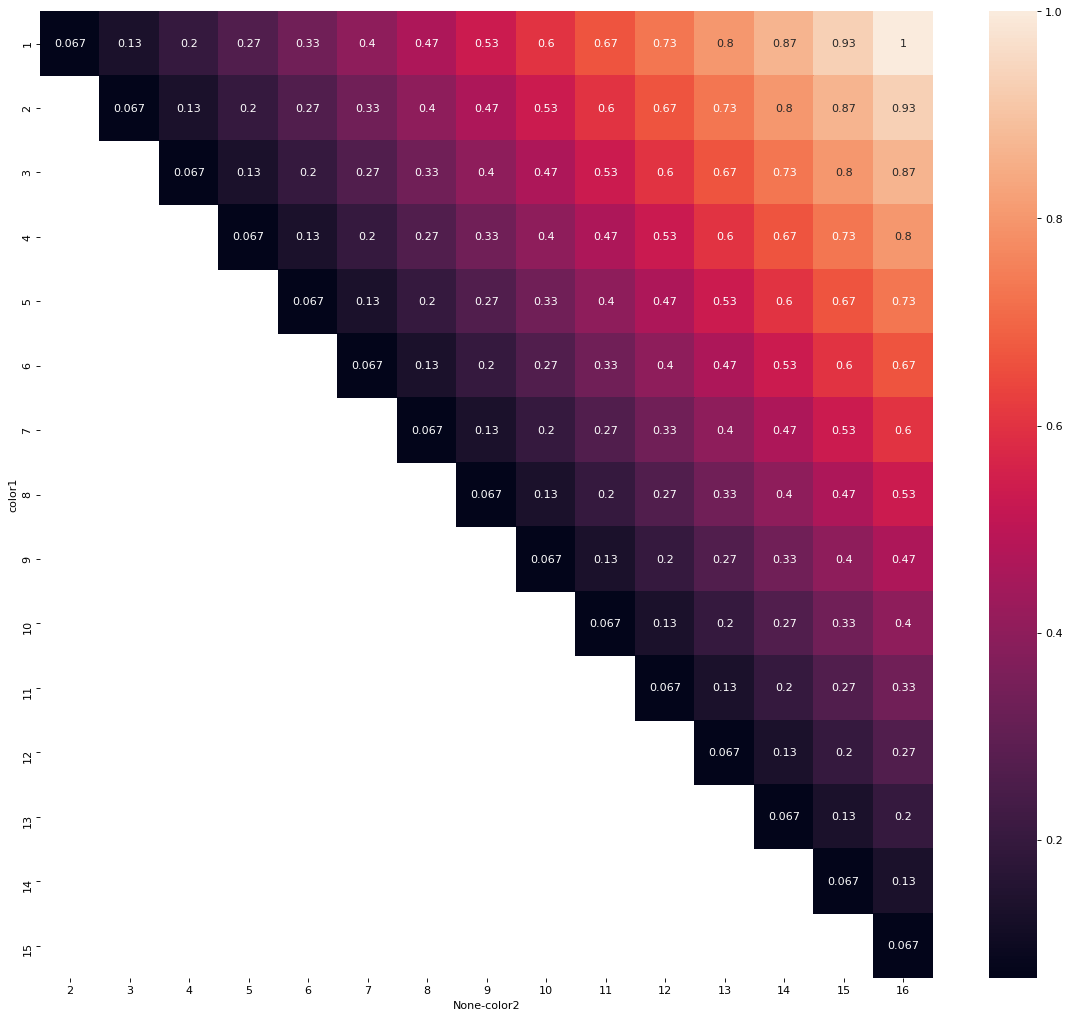

In [213]:
%matplotlib inline
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(colorsPivot,xticklabels=np.arange(2,17),annot=True)


As predicted, all of the colors in the HSV space are uniformly distanced, however, this is not the case with true perceptual decision making. A biologically inspired algorithm that accounts for perceptual color differences as seen in the CIELAB space is needed

- https://en.wikipedia.org/wiki/Color_difference#CIELAB_%CE%94E

This algorithm tries to replicated the MacAdam diagram, in which certain colors within an ellipse of the CIELAB space are considered to be indistinguishable from another, this effect is especially pronounced in the greenish part

- https://en.wikipedia.org/wiki/MacAdam_ellipse

In [205]:
from colormath.color_diff import delta_e_cie2000


In [206]:
mydeltaE=[]
for i in colorCombs:
    mydeltaE.append(delta_e_cie2000(LabColor(list(colorsDF[['L','A','B']].loc[i[0]].values)[0],list(colorsDF[['L','A','B']].loc[1].values)[0],list(colorsDF[['L','A','B']].loc[0].values)[2]),
                LabColor(list(colorsDF[['L','A','B']].loc[i[1]].values)[0],list(colorsDF[['L','A','B']].loc[1].values)[0],list(colorsDF[['L','A','B']].loc[0].values)[2])))


In [214]:
colorIdx['deltaE']=mydeltaE

In [223]:
colorIdx.head()

,color1,color2,hsvDist,deltaE
0,1,2,0.066667,9.170764
1,1,3,0.133333,21.247229
2,1,4,0.200000,27.336080
3,1,5,0.266667,24.963175
4,1,6,0.333333,23.478655


In [216]:
colorsPivot=pd.pivot_table(colorIdx[['color1','color2','deltaE']],index=['color1'],columns='color2')

<AxesSubplot:xlabel='None-color2', ylabel='color1'>

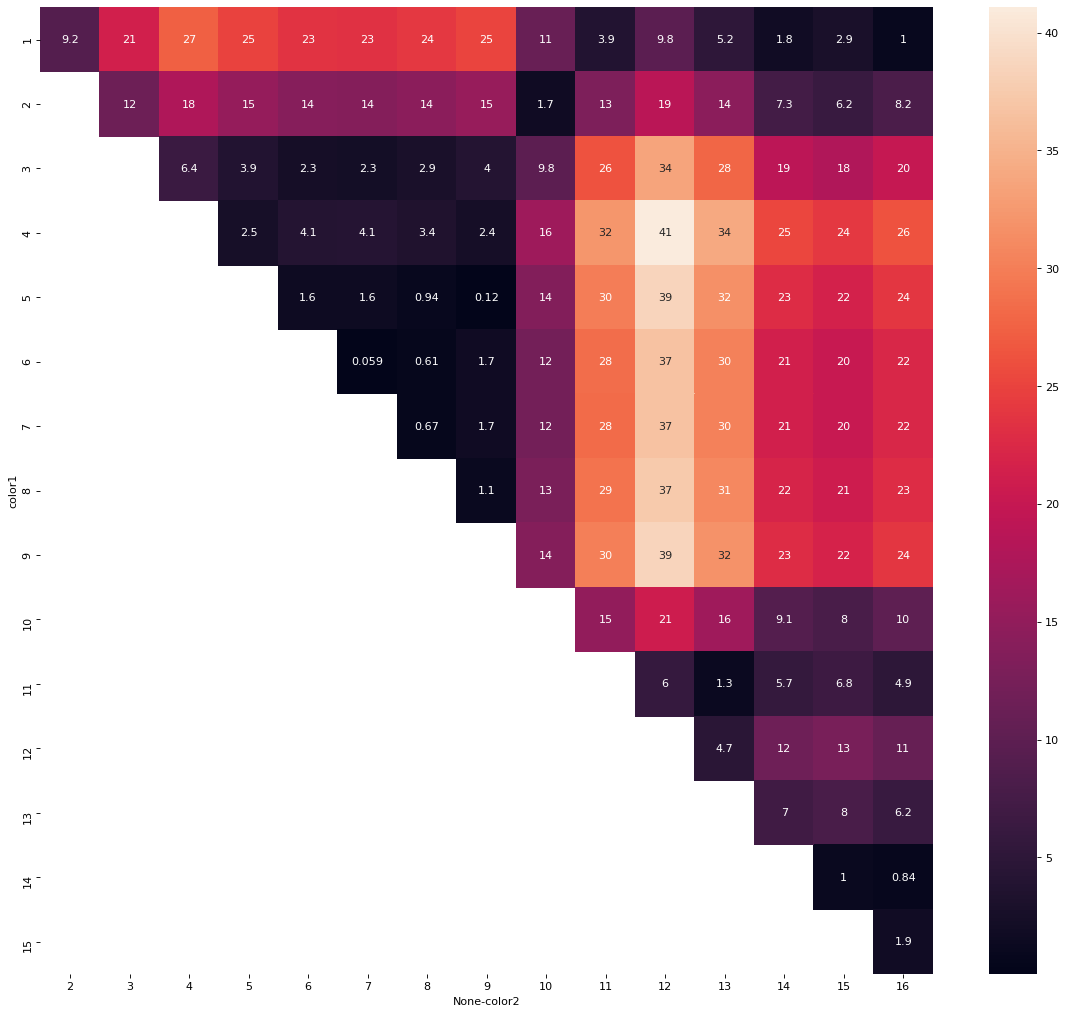

In [218]:
%matplotlib inline
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(colorsPivot,xticklabels=np.arange(2,17),annot=True)

This heatmap gives a better perceptual represntation of distances between colors. It can be noted that all pairs are not uniformally distant.

In [50]:
delta_e_cie1976(LabColor(43,56,34),LabColor(52,33,44))

26.645825188948457

In [57]:
# predictors.to_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\FromSubs\predictors.csv",index=False)

In [204]:
colors = plt.cm.hsv(hues)


In [205]:
len(colors)

20

A visualization of the colors

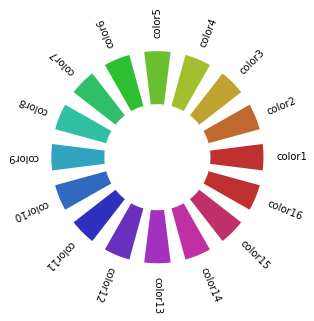

In [222]:
%matplotlib inline
# Compute pie slices
N = 16
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = np.repeat(1,N)
width = np.repeat(0.25,N)

ax = plt.subplot(111, projection='polar')
# bars = ax.bar(theta, radii, width=width, bottom=0.0)
bars = ax.bar(theta, radii, width=width, bottom=1, color=rgb[0])

plt.axis('off')

rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, ['color'+str(i+1) for i in range(16)]):
# for x, bar, rotation, label in zip(theta, bars, rotations, [str(i) for i in probVec]):
    lab = ax.text(x,1.25+bar.get_height() , label, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)   

# # Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.viridis(r / 10.))
#     bar.set_alpha(0.5)

plt.show()